<a href="https://colab.research.google.com/github/edsonportosilva/LPC/blob/lpc-2022-1/Jupyter/Lab3/Lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

```
 Laboratório de Princípios de Comunicações (LPC) 
 Notebook de auxílio ao guia de Experimentos 3
 Tema(s): Filtragem de sinais e Relação sinal-ruído.
 Professor(es): Edson P. da Silva e Luciana Veloso  
 
 As práticas experimentais propostas no experimento 2 têm por objetivos:
 
 - Modulação de amplitude.
 - AM-DSB
 - AM-DSB-SC
 - AM-SSB
 
 ```

# Notebook de auxílio ao Guia de Experimentos 3

<h1>Sumário<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Carrega-sinal-de-áudio" data-toc-modified-id="Carrega-sinal-de-áudio-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Carrega sinal de áudio</a></span></li><li><span><a href="#Caso-1:-modulação-AM-DSB" data-toc-modified-id="Caso-1:-modulação-AM-DSB-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Caso 1: modulação AM-DSB</a></span><ul class="toc-item"><li><span><a href="#Modulação" data-toc-modified-id="Modulação-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Modulação</a></span></li><li><span><a href="#Demodulação-por-envoltória" data-toc-modified-id="Demodulação-por-envoltória-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Demodulação por envoltória</a></span></li><li><span><a href="#Áudio-demodulado" data-toc-modified-id="Áudio-demodulado-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Áudio demodulado</a></span></li></ul></li><li><span><a href="#Caso-2:-modulação-AM-DSB-SC" data-toc-modified-id="Caso-2:-modulação-AM-DSB-SC-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Caso 2: modulação AM-DSB-SC</a></span><ul class="toc-item"><li><span><a href="#Modulação" data-toc-modified-id="Modulação-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Modulação</a></span></li><li><span><a href="#Demodulação-síncrona" data-toc-modified-id="Demodulação-síncrona-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Demodulação síncrona</a></span></li><li><span><a href="#Áudio-demodulado" data-toc-modified-id="Áudio-demodulado-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Áudio demodulado</a></span></li></ul></li><li><span><a href="#Caso-3:-modulação-AM-SSB" data-toc-modified-id="Caso-3:-modulação-AM-SSB-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Caso 3: modulação AM-SSB</a></span><ul class="toc-item"><li><span><a href="#Filtro-de-Hilbert" data-toc-modified-id="Filtro-de-Hilbert-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Filtro de Hilbert</a></span></li><li><span><a href="#Modulação" data-toc-modified-id="Modulação-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Modulação</a></span></li><li><span><a href="#Demodulação-síncrona" data-toc-modified-id="Demodulação-síncrona-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Demodulação síncrona</a></span></li><li><span><a href="#Áudio-demodulado" data-toc-modified-id="Áudio-demodulado-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Áudio demodulado</a></span></li></ul></li><li><span><a href="#Referências" data-toc-modified-id="Referências-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Referências</a></span></li></ul></div>

In [ ]:
from IPython.core.pylabtools import figsize

from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

In [ ]:
# Carrega pacotes 
from scipy.signal import firwin, lfilter, freqz, hilbert
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import normal
import IPython
from scipy.io import loadmat, wavfile

In [ ]:
# bandpass FIR filter.
def bandpass_firwin(ntaps, lowcut, highcut, Fs, window='hamming'):    
    taps = firwin(ntaps, [lowcut, highcut], fs=Fs, pass_zero=False, window=window, scale=True)
    return taps

# bandpass FIR filter.
def lowpass_firwin(ntaps, fcut, Fs, window='hamming'):    
    taps = firwin(ntaps, fcut, fs=Fs, window=window, scale=True)
    return taps

# função para calcular a potência de um sinal
def potSinal(x):
    return (x**2).mean()

def firFilter(h, x):
    """
    h: impulse response (symmetric)
    x: input signal 
    y: output signal
    """   
    N = h.size
    x = np.pad(x, (0, int(N/2)),'constant')
    y = lfilter(h,1,x)
    
    return y[int(N/2):y.size]

def hilbertT(x):
    """
    Hilbert transform of x
    
    x: input signal 
    
    return: hilbert transform of x
    """   
    return np.imag(hilbert(x))

figsize(10, 3)

## Carrega sinal de áudio

In [ ]:
fc_tx  = 10e3     # frequência da portadora
B_sig  = 4e3      # largura de banda do sinal de áudio
ntaps  = 4096+1   # número de coeficientes dos filtros
π      = np.pi

# define filtro passa-baixas com a banda do sinal
g = lowpass_firwin(ntaps, B_sig, Fs)
w, G = freqz(g, fs=Fs, worN=4096)

# plota o valor absoluto das respostas em frequência do filtro passa-baixas
plt.plot(w, 10*np.log10(np.abs(G)), linewidth=2, label = 'G(f)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Gain (dB)')
plt.title('Frequency Response')
plt.legend()
plt.grid(True)
plt.xlim(min(w),max(w));

In [ ]:
# carrega arquivo de áudio
Fs, x = wavfile.read('sinal.wav')

# Pre-processamento:
x = x/abs(x).max(0)  # normaliza amplitude
x = firFilter(g, x)  # limita a banda do sinal

t = np.arange(0, len(x))*1/Fs
plt.figure(figsize =(12,4))
plt.plot(t, x, linewidth = 0.2, label='sinal de voz')
plt.xlabel('tempo (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.xlim(min(t),max(t));
plt.legend()

plt.figure(figsize =(12,4))
plt.psd(x, Fs=Fs, label='DEP do sinal de voz', linewidth=0.8, NFFT=4096); # estima DEP do sinal
plt.legend();
plt.xlim(0,Fs/2);
plt.grid(True);

IPython.display.Audio('sinal.wav')

## Caso 1: modulação AM-DSB

### Modulação

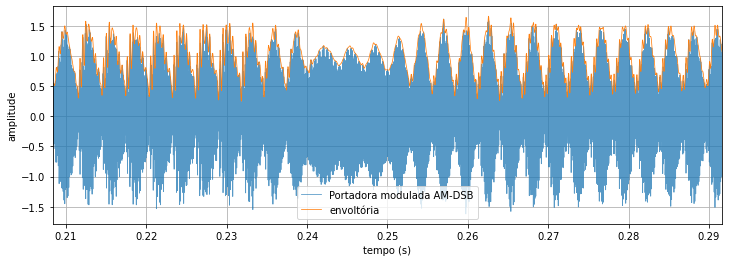

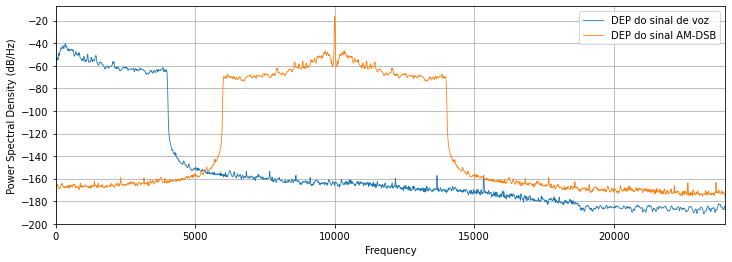

In [134]:
μ = 1.0 # índice de modulação

# Modula sinal de voz DSB e plota espectro do sinal modulado:
s_dsb = ( 1 + μ * x)*np.cos(2*π*fc_tx*t)


analytic_signal = hilbert(s_dsb)
envoltoria = np.abs(analytic_signal)

ind = np.arange(10000,14000)
plt.figure(figsize =(12,4))
plt.plot(t[ind], s_dsb[ind], linewidth=0.8, alpha=0.75, label='Portadora modulada AM-DSB')
plt.plot(t[ind], envoltoria[ind], linewidth=0.75, label='envoltória')
plt.xlabel('tempo (s)')
plt.ylabel('amplitude')
plt.xlim(min(t[ind]), max(t[ind]))
plt.grid()
plt.legend()

plt.figure(figsize =(12,4))
plt.psd(x, Fs=Fs, label='DEP do sinal de voz',sides='onesided', linewidth=0.8, NFFT=4096); # estima DEP do sinal
plt.psd(s_dsb, Fs=Fs, label='DEP do sinal AM-DSB',sides='onesided', linewidth=0.8, NFFT=4096); # estima DEP do sinal modulado
plt.legend();
plt.xlim(0,Fs/2);
plt.grid(True)

### Demodulação por envoltória

In [ ]:
s_dsb_rx = np.abs(s_dsb)                # retificador
x_demod = s_dsb_rx - np.mean(s_dsb_rx)  # retira nível DC
x_demod = firFilter(g, x_demod)  # filtragem passa-baixas

plt.figure(figsize =(12,4))
plt.psd(s_dsb_rx, Fs=Fs, label='DEP do sinal após o retificador',sides='twosided', linewidth=0.8, NFFT=4096); # estima DEP do sinal
plt.psd(x_demod, Fs=Fs, label='DEP do sinal após o fpb',sides='twosided', linewidth=0.8, NFFT=4096); # estima DEP do sinal
plt.legend();
plt.xlim(0,Fs/2);
plt.grid(True)

t = np.arange(0, len(x))*1/Fs
plt.figure(figsize =(12,4))
plt.plot(t, x_demod, linewidth = 0.2, label='sinal de voz demodulado')
plt.xlabel('tempo (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.xlim(min(t),max(t))
plt.legend();

### Áudio demodulado

In [ ]:
x_demod = x_demod/abs(x_demod).max(0)
wavfile.write('voz_demodAMDSB.wav', int(Fs), x_demod.astype(np.float32))

IPython.display.Audio('voz_demodAMDSB.wav')

## Caso 2: modulação AM-DSB-SC

### Modulação

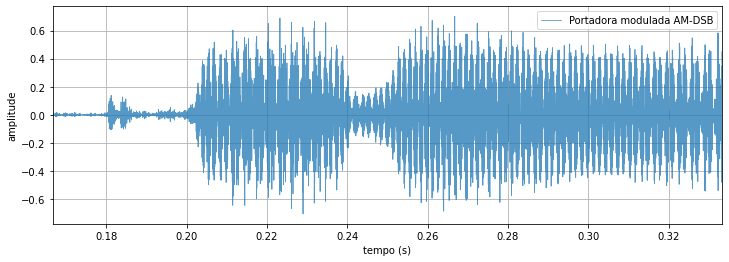

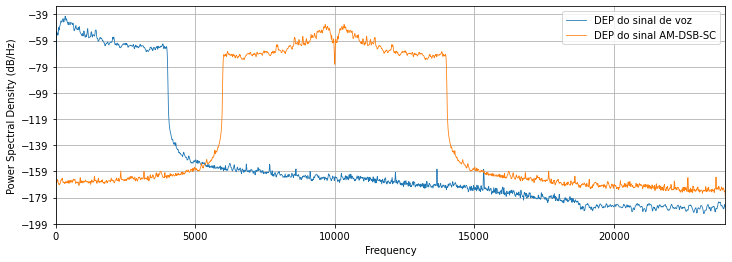

In [131]:
# Modula sinal de voz e plota espectro do sinal modulado:
s_dsb = x * np.cos(2*π*fc_tx*t)  # AM-DSB-SC


ind = np.arange(8000,16000)
plt.figure(figsize =(12,4))
plt.plot(t[ind], s_dsb[ind], linewidth=0.8, alpha=0.75, label='Portadora modulada AM-DSB')
plt.xlabel('tempo (s)')
plt.ylabel('amplitude')
plt.xlim(min(t[ind]), max(t[ind]))
plt.grid()
plt.legend()

plt.figure(figsize =(12,4))
plt.psd(x, Fs=Fs, label='DEP do sinal de voz',sides='onesided', linewidth=0.8, NFFT=4096); # estima DEP do sinal
plt.psd(s_dsb, Fs=Fs, label='DEP do sinal AM-DSB-SC',sides='onesided', linewidth=0.8, NFFT=4096); # estima DEP do sinal modulado
plt.legend();
plt.xlim(0,Fs/2);
plt.grid(True)

### Demodulação síncrona

In [ ]:
# demodulação síncrona
s_dsb_rx = s_dsb*np.cos(2*π*fc_tx*t) # mixer
x_demod = firFilter(g, s_dsb_rx)     # filtragem passa-baixas

plt.figure(figsize =(12,4))
plt.psd(s_dsb_rx, Fs=Fs, label='DEP do sinal após o mixer',sides='onesided', linewidth=0.8, NFFT=4096); # estima DEP do sinal
plt.psd(x_demod, Fs=Fs, label='DEP do sinal após o fpb',sides='onesided', linewidth=0.8, NFFT=4096); # estima DEP do sinal
plt.legend();
plt.xlim(0,Fs/2);
plt.grid(True)

t = np.arange(0, len(x))*1/Fs
plt.figure(figsize =(12,4))
plt.plot(t, x_demod, linewidth = 0.2, label='sinal de voz demodulado')
plt.xlabel('tempo (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.xlim(min(t),max(t))
plt.legend();

### Áudio demodulado

In [ ]:
x_demod = x_demod/abs(x_demod).max(0)
wavfile.write('voz_demodAMDSB-SC.wav', int(Fs), x_demod.astype(np.float32))

IPython.display.Audio('voz_demodAMDSB-SC.wav')

## Caso 3: modulação AM-SSB

### Filtro de Hilbert

In [ ]:
N = 4*2096              # número de coeficientes do filtro
n = np.arange(-N,N+1)

h = np.zeros(n.shape)
h[n%2==1] = 2/(π*n[n%2==1])

plt.vlines(n, 0, h,linewidth=2)
plt.plot(n, h,'.', label='h(n)')
plt.title('Resposta ao impulso do filtro de Hilbert discreto')
plt.xlim(-64, 64)
plt.grid()
plt.xlabel('índice do coefficiente (n)')
plt.ylabel('h(n)')
plt.legend();

### Modulação

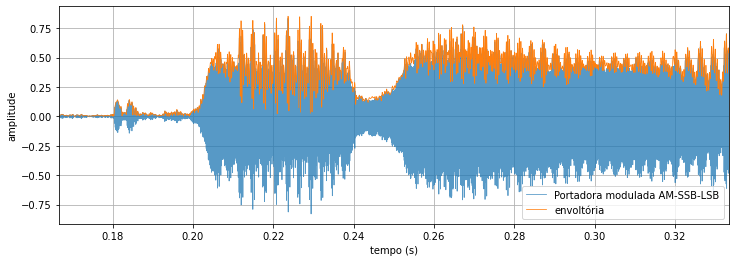

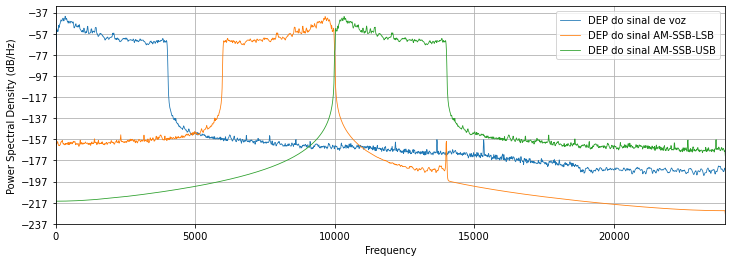

In [130]:
s_ssb_lsb = x * np.cos(2*π*fc_tx*t) + hilbertT(x) * np.sin(2*π*fc_tx*t) # AM-SSB-LSB
s_ssb_usb = x * np.cos(2*π*fc_tx*t) - hilbertT(x) * np.sin(2*π*fc_tx*t) # AM-SSB-USB

# s_ssb_lsb = x * np.cos(2*π*fc_tx*t) + firFilter(h,x) * np.sin(2*π*fc_tx*t) # AM-SSB-LSB
# s_ssb_usb = x * np.cos(2*π*fc_tx*t) - firFilter(h,x) * np.sin(2*π*fc_tx*t) # AM-SSB-USB

ind = np.arange(8000,16000)
plt.figure(figsize =(12,4))
plt.plot(t[ind], s_ssb_lsb[ind], linewidth=0.8, alpha=0.75, label='Portadora modulada AM-SSB-LSB')
plt.xlabel('tempo (s)')
plt.ylabel('amplitude')
plt.xlim(min(t[ind]), max(t[ind]))
plt.grid()
plt.legend()

plt.figure(figsize =(12,4))
plt.psd(x, Fs=Fs, label='DEP do sinal de voz',sides='onesided', linewidth=0.8, NFFT=4096); # estima DEP do sinal
plt.psd(s_ssb_lsb, Fs=Fs, label='DEP do sinal AM-SSB-LSB',sides='onesided', linewidth=0.8, NFFT=4096); # estima DEP do sinal modulado
plt.psd(s_ssb_usb, Fs=Fs, label='DEP do sinal AM-SSB-USB',sides='onesided', linewidth=0.8, NFFT=4096); # estima DEP do sinal modulado
plt.legend();
plt.xlim(0,Fs/2);
plt.grid(True)

### Demodulação síncrona

In [ ]:
# demodulação síncrona
s_ssb_rx = s_ssb_lsb*np.cos(2*π*fc_tx*t) # mixer
x_demod = firFilter(g, s_ssb_rx)     # filtragem passa-baixas

plt.figure(figsize =(12,4))
plt.psd(s_ssb_rx, Fs=Fs, label='DEP do sinal após o mixer',sides='onesided', linewidth=0.8, NFFT=4096); # estima DEP do sinal
plt.psd(x_demod, Fs=Fs, label='DEP do sinal após o fpb',sides='onesided', linewidth=0.8, NFFT=4096); # estima DEP do sinal
plt.legend();
plt.xlim(0,Fs/2);
plt.grid(True)

t = np.arange(0, len(x))*1/Fs
plt.figure(figsize =(12,4))
plt.plot(t, x_demod, linewidth = 0.2, label='sinal de voz demodulado')
plt.xlabel('tempo (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.xlim(min(t),max(t))
plt.legend();

### Áudio demodulado

In [ ]:
x_demod = x_demod/abs(x_demod).max(0)
wavfile.write('voz_demodAMSSB.wav', int(Fs), x_demod.astype(np.float32))

IPython.display.Audio('voz_demodAMSSB.wav')

## Referências

[Função convolve()](https://numpy.org/doc/stable/reference/generated/numpy.convolve.html)\
[Função freqz()](https://docs.scipy.org/doc/scipy-0.16.0/reference/generated/scipy.signal.freqz.html)\
[Função psd()](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.psd.html#matplotlib.pyplot.psd)